In [89]:
import pandas as pd
import numpy as np
import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


from sklearn.metrics import mean_squared_error

In [90]:
data = pd.read_csv("data/preprocessed_data.csv", index_col='TIMESTAMP', parse_dates=['TIMESTAMP'])
train = data[data.index < '2020-01-01']
test = data[data.index >= '2020-01-01']

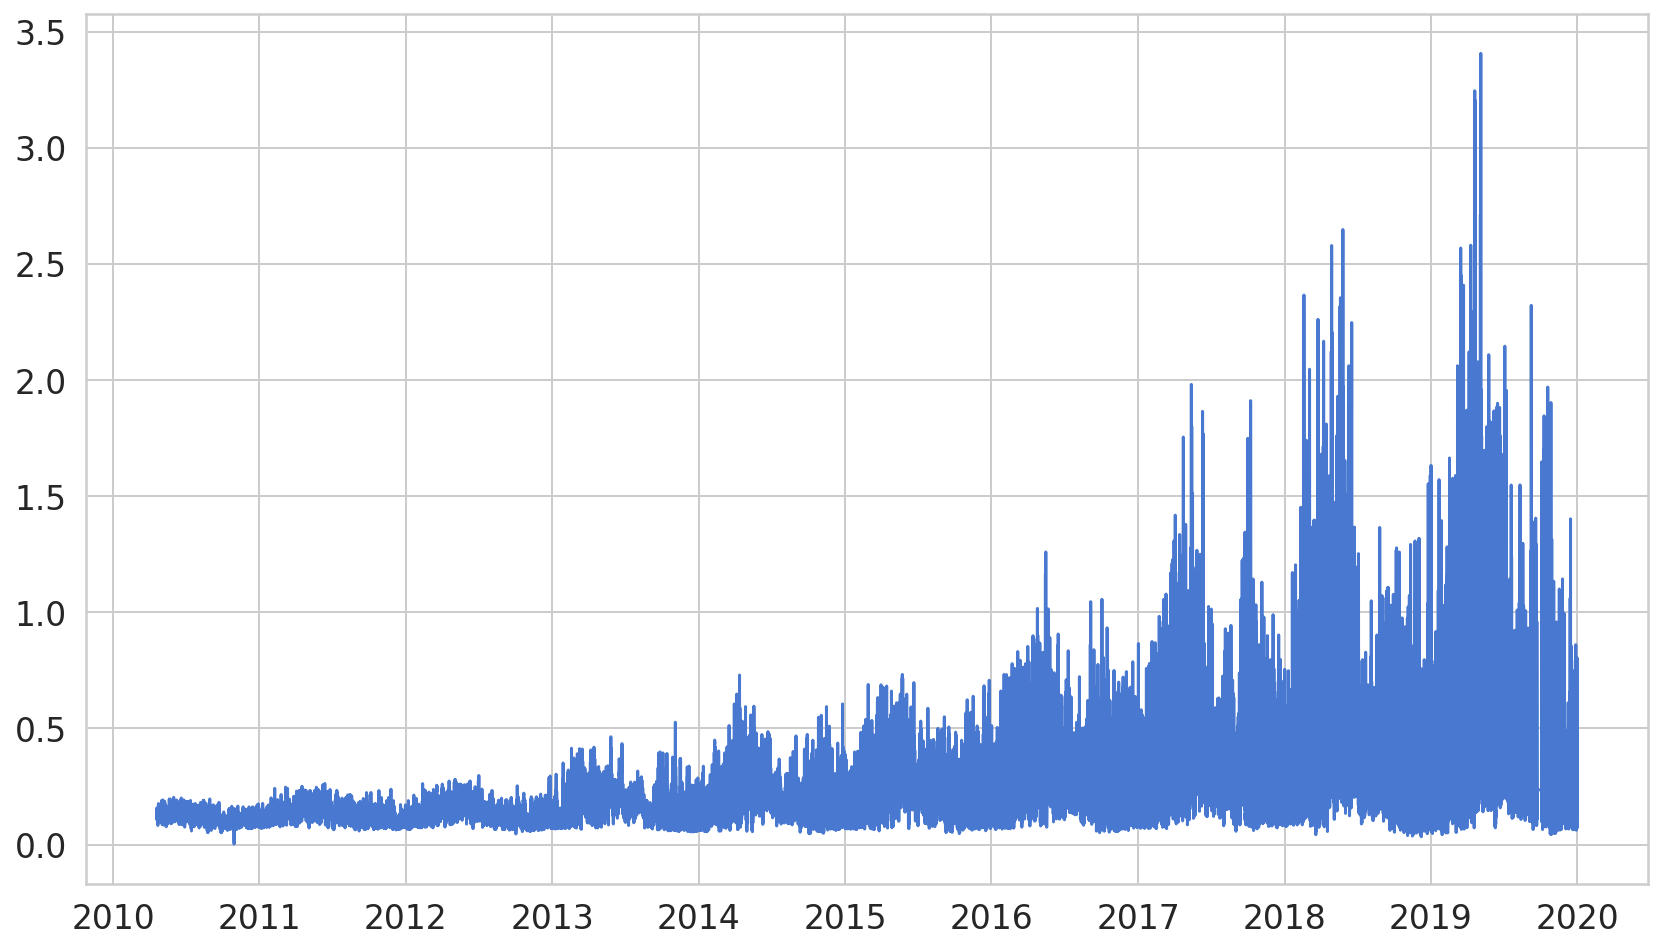

In [91]:
plt.plot(train['RENEWABLES_RATIO'])
plt.show();

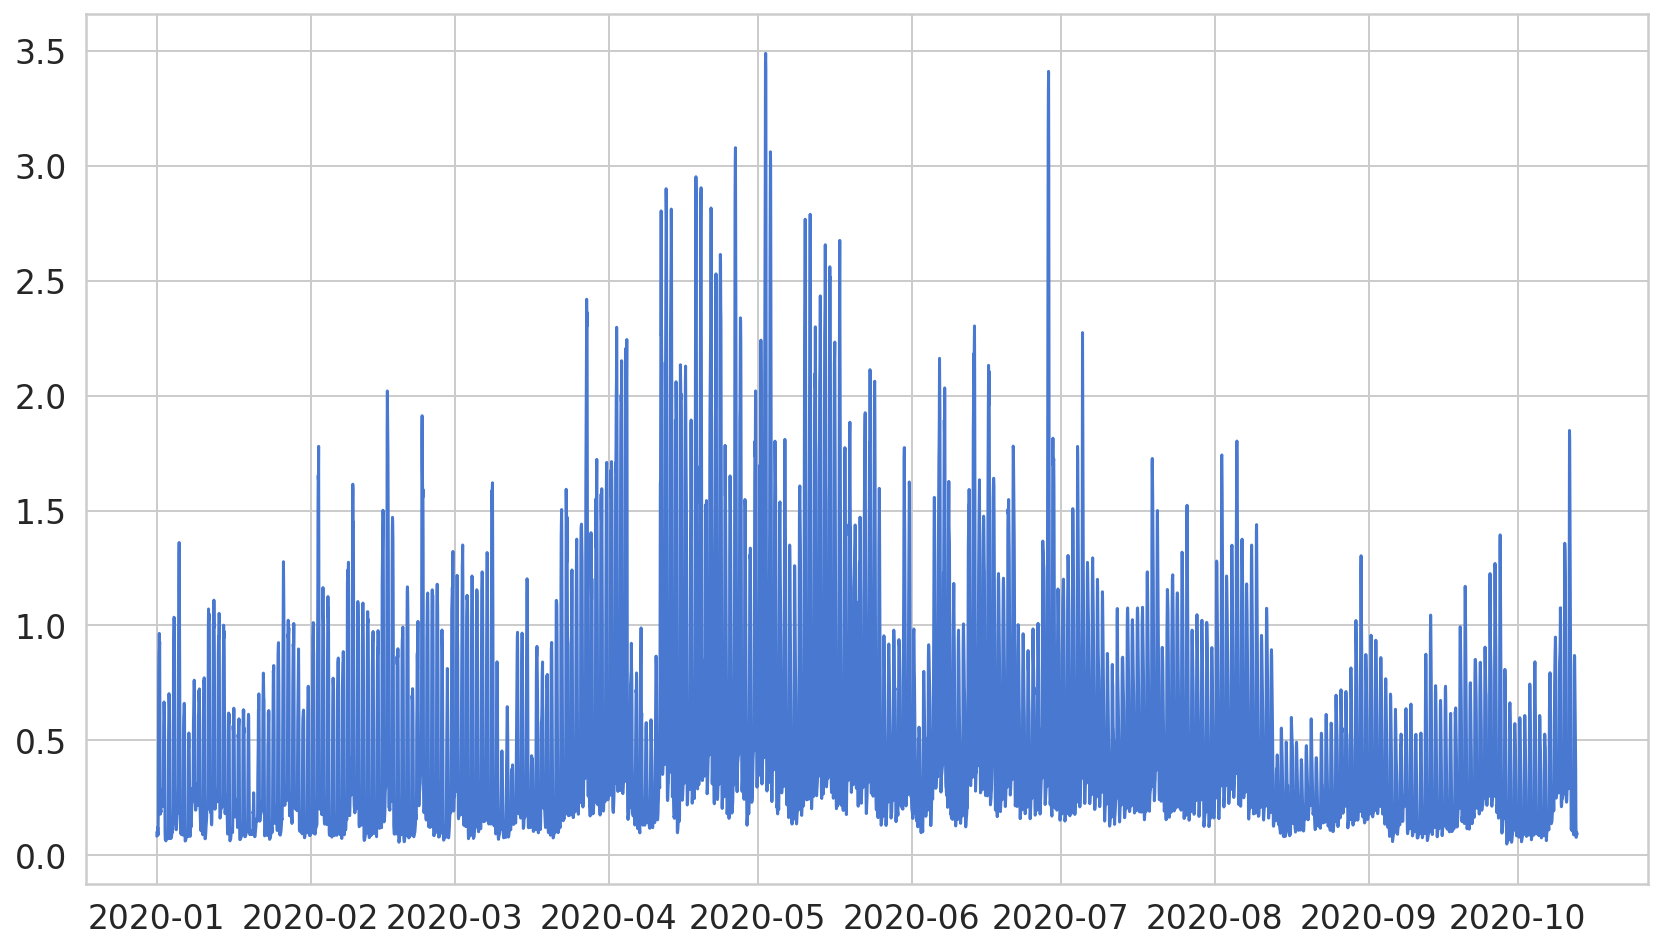

In [92]:
plt.plot(test['RENEWABLES_RATIO'])
plt.show();

In [93]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [94]:
time_steps = 24
train_slim = train[['RENEWABLES_RATIO']]
test_slim = test[['RENEWABLES_RATIO']]

In [95]:
X_train, y_train = create_dataset(train_slim, train_slim['RENEWABLES_RATIO'], time_steps)
X_test, y_test = create_dataset(test_slim, test_slim['RENEWABLES_RATIO'], time_steps)

In [96]:
print(X_train.shape, y_train.shape)

(85008, 24, 1) (85008,)


In [97]:
model = keras.Sequential()
model.add(keras.layers.LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(X_train, y_train,epochs=100, batch_size=128,validation_split=0.2,verbose=1,shuffle=False)

Epoch 1/100
532/532 [==============================] - 11s 21ms/step - loss: 0.0053 - val_loss: 0.0296
Epoch 2/100
532/532 [==============================] - 11s 20ms/step - loss: 0.0023 - val_loss: 0.0220
Epoch 3/100
532/532 [==============================] - 11s 20ms/step - loss: 0.0015 - val_loss: 0.0108
Epoch 4/100
532/532 [==============================] - 11s 20ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 5/100
532/532 [==============================] - 11s 20ms/step - loss: 9.0000e-04 - val_loss: 0.0063
Epoch 6/100
532/532 [==============================] - 11s 20ms/step - loss: 7.9576e-04 - val_loss: 0.0065
Epoch 7/100
532/532 [==============================] - 11s 20ms/step - loss: 7.9472e-04 - val_loss: 0.0061
Epoch 8/100
532/532 [==============================] - 11s 20ms/step - loss: 7.1127e-04 - val_loss: 0.0059
Epoch 9/100
532/532 [==============================] - 11s 20ms/step - loss: 6.5103e-04 - val_loss: 0.0059
Epoch 10/100
532/532 [==============================]

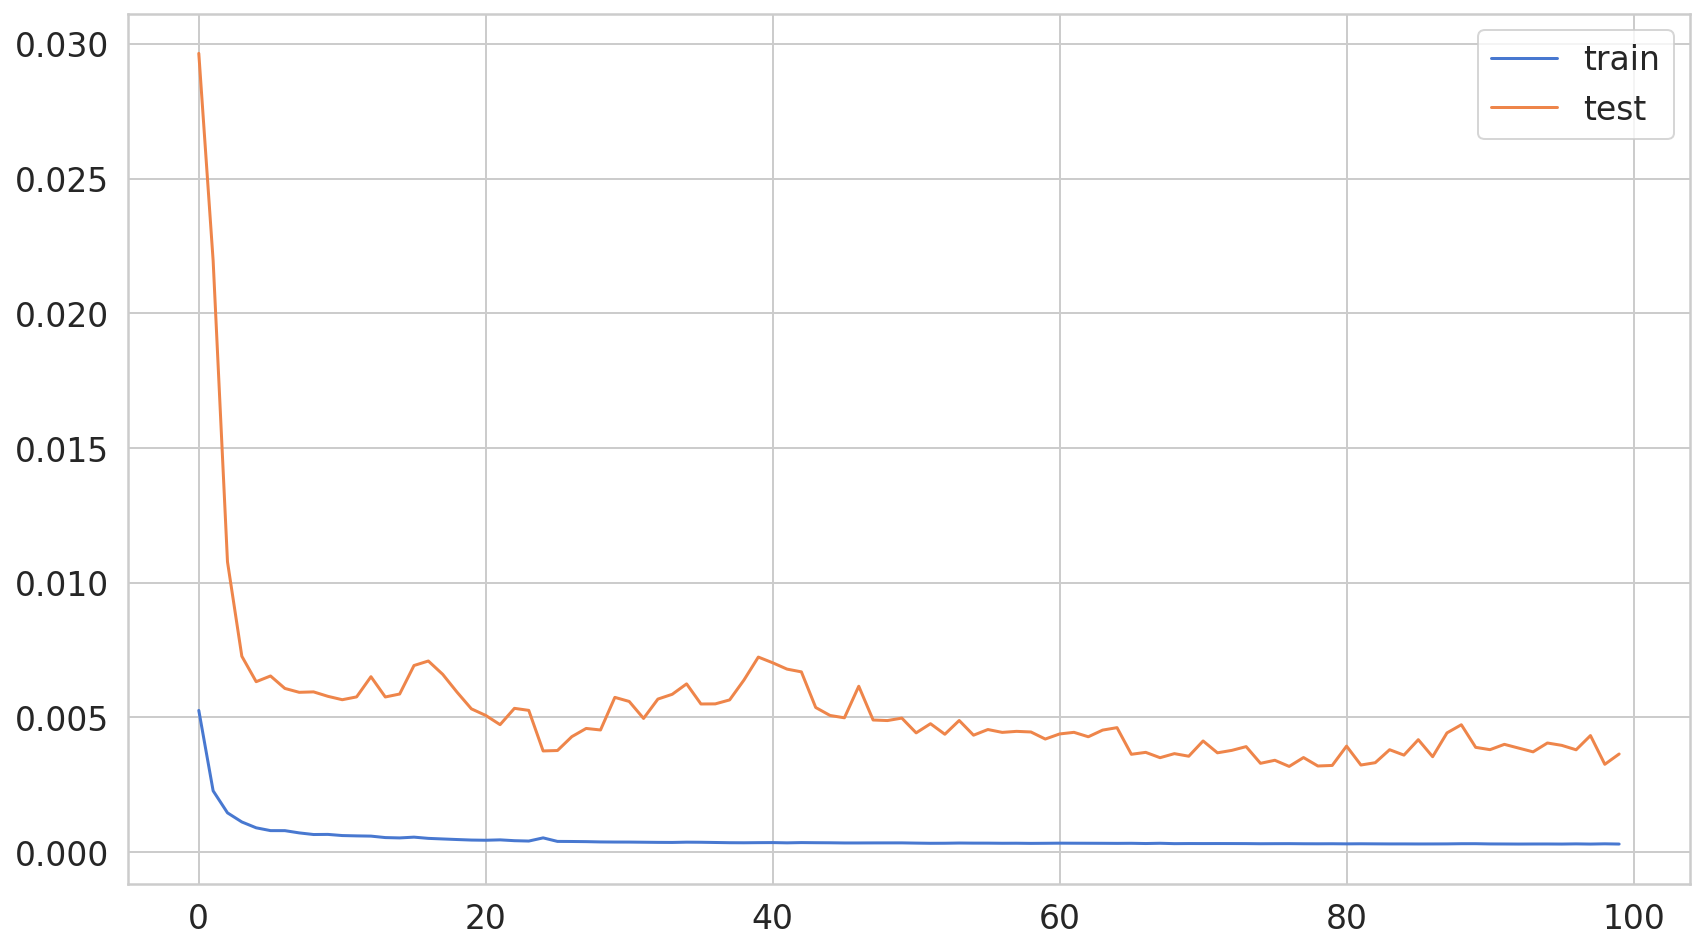

In [99]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [100]:
y_pred = model.predict(X_test)

In [101]:
test_RMSE = mean_squared_error(y_test,y_pred,squared=False)
test_RMSE

0.07744922755957546

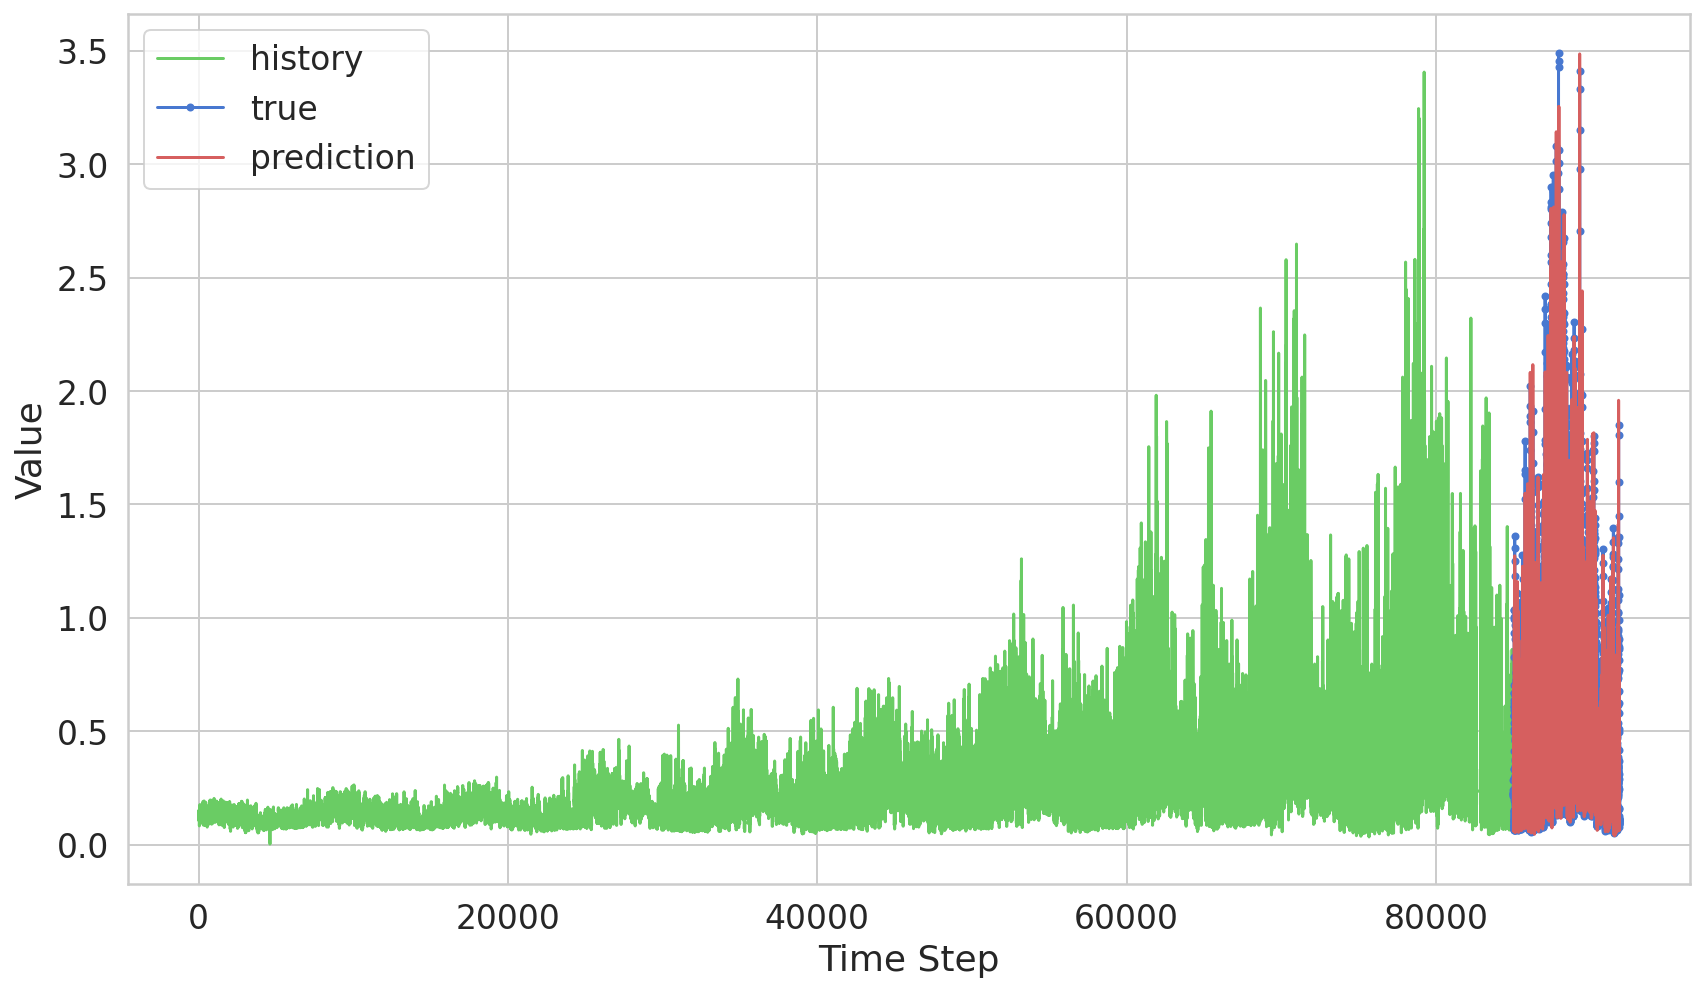

In [102]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

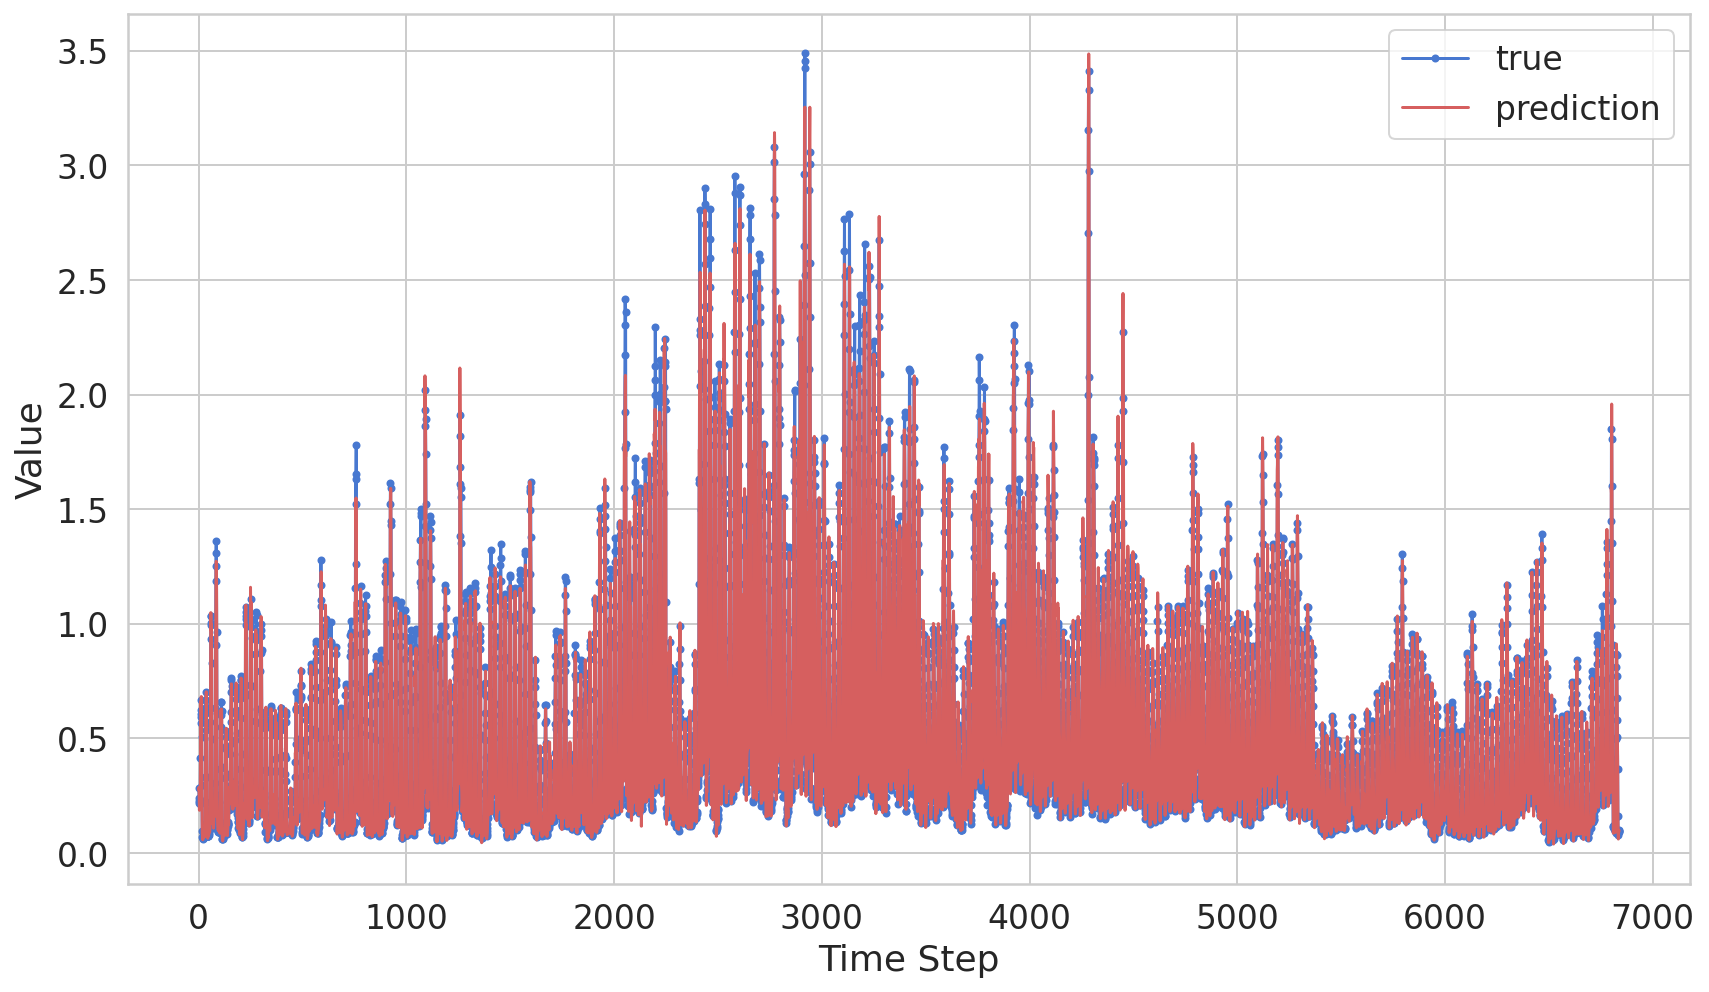

In [103]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();